In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.colors as colors
from subprocess import call
import matplotlib.cm as cm
from matplotlib import rc
import matplotlib as mpl
import seaborn as sns 
from matplotlib.colors import ListedColormap
from ipywidgets import widgets as wgt
from scipy.interpolate import griddata
from matplotlib.colors import LinearSegmentedColormap
import imageio
import os

from ipywidgets import interact, widgets, FloatSlider, FloatText, fixed
from IPython.display import display, clear_output

from scipy.optimize import minimize
mpl.rcParams.update(
    {
        'figure.constrained_layout.use': True,
        'interactive': False,
        "text.usetex": False,  # Use mathtext, not LaTeX
        "font.family": "cmr10",  # Use the Computer modern font
        "mathtext.fontset": "cm",
        "axes.formatter.use_mathtext": True,
        "axes.unicode_minus": False,
    }
)

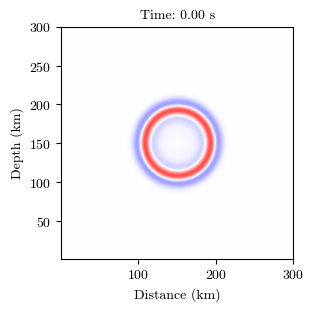

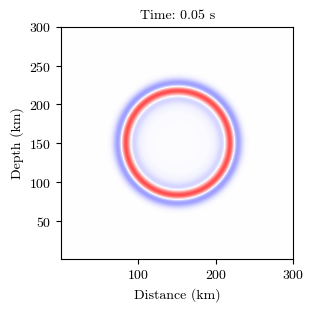

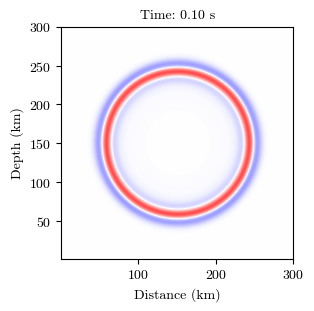

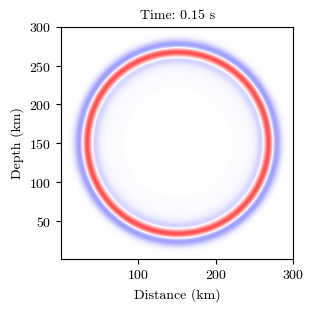

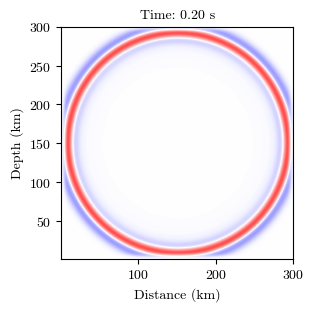

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Cargar los datos del archivo .txt
its = [1500, 2000, 2500, 3000, 3500]

for i, it in enumerate(its):
    # Cargar los datos correspondientes
    data = np.loadtxt(f'output/pressure_future_{it}.txt')
    x = data[:, 0]
    y = data[:, 1]
    pressure = data[:, 2]

    # Definir el colormap personalizado
    rgb = {'red': ((0.0, 0.0, 0.0),
                   (0.5, 1.0, 1.0),
                   (1.0, 1.0, 1.0)),

           'green': ((0.0, 0.0, 0.0),
                     (0.5, 1.0, 1.0),
                     (1.0, 0.0, 0.0)),

           'blue': ((0.0, 1.0, 1.0),
                    (0.5, 1.0, 1.0),
                    (1.0, 0.0, 0.0))
           }

    # Definir el colormap
    rgb = LinearSegmentedColormap('RedGreenBlue', rgb)

    # Reorganizar los valores de presión en una matriz
    wavefields = pressure.reshape((len(np.unique(y)), len(np.unique(x))))

    # Definir los límites de los ejes
    x_min, x_max = np.min(x), np.max(x)
    y_min, y_max = np.min(y), np.max(y)
    wavefields_min, wavefields_max = np.min(wavefields), np.max(wavefields)

    # Crear la figura y el subplot
    plt.figure(figsize=(4, 3))
    plt.title(f'Time: {0.0001*it-0.15:.2f} s', fontsize=10)
    plt.xlabel('Distance (km)', fontsize=10)
    plt.ylabel('Depth (km)', fontsize=10)

    # Mostrar el subplot
    plt.imshow(wavefields, extent=[x_min, x_max, y_min, y_max], aspect=1, cmap=rgb, alpha=0.7, vmin=-wavefields_max, vmax=wavefields_max)

    # Guardar la figura individualmente con un nombre único
    plt.savefig(f'wavefields_{it}.png')

    # Mostrar la figura
    plt.show()
